In [56]:
#Function to draw the pitch
import matplotlib.pyplot as plt
import numpy as np


In [57]:
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

#ID for Barcelona vs Malaga 
match_id_required = 69340
home_team_required ="Barcelona"
away_team_required ="Málaga"

In [58]:
# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'


In [59]:
#Load in all match events 
import json
with open('Statsbomb/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)


In [60]:
#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])


In [62]:
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

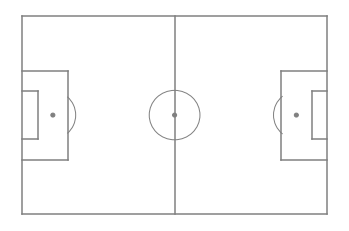

In [63]:
#Draw the pitch
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

In [64]:
#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2
    #circleSize=np.sqrt(shot['shot_statsbomb_xg']*15)

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
fig.savefig('Output/shot.pdf', dpi=100) 
plt.show()

In [65]:
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

In [66]:
#Plot the passes of Messi
for i,thepass in passes.iterrows():
    if thepass['player_name']=='Lionel Andrés Messi Cuccittini':
        x=thepass['location'][0]
        y=thepass['location'][1]
        passCircle=plt.Circle((x,pitchWidthY-y),2,color="red")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['location'][0]-x
        dy=thepass['location'][1]-y
        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=3,color="red")
        ax.add_patch(passArrow)
    
fig.set_size_inches(10, 7)
fig.savefig('Output/pass.pdf', dpi=100) 
plt.show()